In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


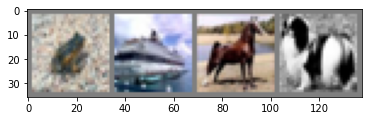

frog  ship  horse dog  


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Question A:\
Model 0: CNN\
Model 1: DNN with 0 hidden layer\
Model 2: DNN with 1 hidden layer\
Model 3: DNN with 2 hidden layer\
Model 4: DNN with 3 hidden layer\
Model 5: DNN with 4 hidden layer\

Model 0:

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class CNN0(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model0 = CNN0()

Model 1:


In [5]:
class DNN1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32*32*3,10)
    
    def forward(self,x):
        x = torch.flatten(x,1)
        x = self.fc1(x)
        return x
model1 = DNN1()

Model 2:

In [6]:
class DNN2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32*32*3,512)
        self.fc2 = nn.Linear(512,10)
    def forward(self,x):
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        self.dropout = nn.Dropout(0.5)
        x = self.fc2(x)
        return x 
model2 = DNN2()

Model 3:

In [7]:
class DNN3(nn.Module):
   def __init__(self):
       super().__init__()
       self.fc1 = nn.Linear(32*32*3,512)
       self.fc2 = nn.Linear(512,512)
       self.fc3 = nn.Linear(512,10)
   def forward(self,x):
       x = torch.flatten(x,1)
       x = F.relu(self.fc1(x))
       self.dropout = nn.Dropout(0.5)
       x = self.fc2(x)
       self.dropout = nn.Dropout(0.5)
       x = self.fc3(x)
       return x
model3 = DNN3()

Model 4:

In [8]:
class DNN4(nn.Module):
   def __init__(self):
       super().__init__()
       self.fc1 = nn.Linear(32*32*3,512)
       self.fc2 = nn.Linear(512,512)
       self.fc3 = nn.Linear(512,512)
       self.fc4 = nn.Linear(512,10)
   def forward(self,x):
       x = torch.flatten(x,1)
       x = F.relu(self.fc1(x))
       self.dropout = nn.Dropout(0.5)
       x = self.fc2(x)
       self.dropout = nn.Dropout(0.5)
       x = self.fc3(x)
       self.dropout = nn.Dropout(0.5)
       x = self.fc4(x)
       return x
model4 = DNN4()

Model 5:

In [9]:
class DNN5(nn.Module):
   def __init__(self):
       super().__init__()
       self.fc1 = nn.Linear(32*32*3,512)
       self.fc2 = nn.Linear(512,512)
       self.fc3 = nn.Linear(512,512)
       self.fc4 = nn.Linear(512,512)
       self.fc5 = nn.Linear(512,10)
   def forward(self,x):
       x = torch.flatten(x,1)
       x = F.relu(self.fc1(x))
       self.dropout = nn.Dropout(0.5)
       x = self.fc2(x)
       self.dropout = nn.Dropout(0.5)
       x = self.fc3(x)
       self.dropout = nn.Dropout(0.5)
       x = self.fc4(x)
       self.dropout = nn.Dropout(0.5)
       x = self.fc5(x)
       return x
model5 = DNN5()

Training the model:\
Setting the optimizers for each models:\
Define accuracy function:\
Return loss and accuracy:

In [11]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer0 = optim.SGD(model0.parameters(), lr=0.001, momentum=0.9)
optimizer1 = optim.SGD(model1.parameters(), lr=0.001, momentum=0.9)
optimizer2 = optim.SGD(model2.parameters(), lr=0.001, momentum=0.9)
optimizer3 = optim.SGD(model3.parameters(), lr=0.001, momentum=0.9)
optimizer4 = optim.SGD(model4.parameters(), lr=0.001, momentum=0.9)
optimizer5 = optim.SGD(model5.parameters(), lr=0.001, momentum=0.9)

Model 0:

In [12]:
accuracy0 = []
for epoch in range(10):  

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer0.zero_grad()
        outputs = model0(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer0.step()
        running_loss += loss.item()
        if i % 2000 == 1999:   
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
       for data in testloader:
          images, labels = data
          outputs = model0(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
    ac = correct / total
    accuracy0.append(ac)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 2.180
[1,  4000] loss: 1.845
[1,  6000] loss: 1.677
[1,  8000] loss: 1.563
[1, 10000] loss: 1.519
[1, 12000] loss: 1.468
Accuracy of the network on the 10000 test images: 47 %
[2,  2000] loss: 1.383
[2,  4000] loss: 1.391
[2,  6000] loss: 1.331
[2,  8000] loss: 1.310
[2, 10000] loss: 1.295
[2, 12000] loss: 1.281
Accuracy of the network on the 10000 test images: 55 %
[3,  2000] loss: 1.194
[3,  4000] loss: 1.203
[3,  6000] loss: 1.195
[3,  8000] loss: 1.188
[3, 10000] loss: 1.178
[3, 12000] loss: 1.174
Accuracy of the network on the 10000 test images: 57 %
[4,  2000] loss: 1.066
[4,  4000] loss: 1.113
[4,  6000] loss: 1.112
[4,  8000] loss: 1.109
[4, 10000] loss: 1.083
[4, 12000] loss: 1.090
Accuracy of the network on the 10000 test images: 60 %
[5,  2000] loss: 0.990
[5,  4000] loss: 1.038
[5,  6000] loss: 1.045
[5,  8000] loss: 1.033
[5, 10000] loss: 1.034
[5, 12000] loss: 1.030
Accuracy of the network on the 10000 test images: 59 %
[6,  2000] loss: 0.963
[6,  4000] l

Model 1:

In [13]:
accuracy1 = []
for epoch in range(10):  

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer1.zero_grad()
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer1.step()
        running_loss += loss.item()
        if i % 2000 == 1999:   
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
       for data in testloader:
          images, labels = data
          outputs = model1(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
    ac = correct / total
    accuracy1.append(ac)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 2.196
[1,  4000] loss: 2.199
[1,  6000] loss: 2.136
[1,  8000] loss: 2.147
[1, 10000] loss: 2.169
[1, 12000] loss: 2.159
Accuracy of the network on the 10000 test images: 33 %
[2,  2000] loss: 2.092
[2,  4000] loss: 2.106
[2,  6000] loss: 2.108
[2,  8000] loss: 2.137
[2, 10000] loss: 2.092
[2, 12000] loss: 2.101
Accuracy of the network on the 10000 test images: 32 %
[3,  2000] loss: 2.016
[3,  4000] loss: 2.068
[3,  6000] loss: 2.103
[3,  8000] loss: 2.086
[3, 10000] loss: 2.113
[3, 12000] loss: 2.100
Accuracy of the network on the 10000 test images: 34 %
[4,  2000] loss: 2.022
[4,  4000] loss: 2.066
[4,  6000] loss: 2.057
[4,  8000] loss: 2.071
[4, 10000] loss: 2.107
[4, 12000] loss: 2.105
Accuracy of the network on the 10000 test images: 33 %
[5,  2000] loss: 1.963
[5,  4000] loss: 2.056
[5,  6000] loss: 2.073
[5,  8000] loss: 2.105
[5, 10000] loss: 2.077
[5, 12000] loss: 2.065
Accuracy of the network on the 10000 test images: 33 %
[6,  2000] loss: 2.034
[6,  4000] l

Model 2:

In [14]:
accuracy2 = []
for epoch in range(10):  

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer2.zero_grad()
        outputs = model2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer2.step()
        running_loss += loss.item()
        if i % 2000 == 1999:   
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
       for data in testloader:
          images, labels = data
          outputs = model2(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
    ac = correct / total
    accuracy2.append(ac)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 1.825
[1,  4000] loss: 1.696
[1,  6000] loss: 1.644
[1,  8000] loss: 1.592
[1, 10000] loss: 1.571
[1, 12000] loss: 1.561
Accuracy of the network on the 10000 test images: 46 %
[2,  2000] loss: 1.495
[2,  4000] loss: 1.481
[2,  6000] loss: 1.481
[2,  8000] loss: 1.465
[2, 10000] loss: 1.472
[2, 12000] loss: 1.466
Accuracy of the network on the 10000 test images: 46 %
[3,  2000] loss: 1.359
[3,  4000] loss: 1.383
[3,  6000] loss: 1.412
[3,  8000] loss: 1.430
[3, 10000] loss: 1.407
[3, 12000] loss: 1.412
Accuracy of the network on the 10000 test images: 48 %
[4,  2000] loss: 1.332
[4,  4000] loss: 1.321
[4,  6000] loss: 1.335
[4,  8000] loss: 1.350
[4, 10000] loss: 1.364
[4, 12000] loss: 1.338
Accuracy of the network on the 10000 test images: 47 %
[5,  2000] loss: 1.248
[5,  4000] loss: 1.259
[5,  6000] loss: 1.283
[5,  8000] loss: 1.331
[5, 10000] loss: 1.312
[5, 12000] loss: 1.302
Accuracy of the network on the 10000 test images: 51 %
[6,  2000] loss: 1.179
[6,  4000] l

Model 3:

In [15]:
accuracy3 = []
for epoch in range(10):  

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer3.zero_grad()
        outputs = model3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer3.step()
        running_loss += loss.item()
        if i % 2000 == 1999:   
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
       for data in testloader:
          images, labels = data
          outputs = model3(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
    ac = correct / total
    accuracy3.append(ac)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 1.877
[1,  4000] loss: 1.692
[1,  6000] loss: 1.634
[1,  8000] loss: 1.596
[1, 10000] loss: 1.576
[1, 12000] loss: 1.532
Accuracy of the network on the 10000 test images: 47 %
[2,  2000] loss: 1.462
[2,  4000] loss: 1.457
[2,  6000] loss: 1.474
[2,  8000] loss: 1.455
[2, 10000] loss: 1.470
[2, 12000] loss: 1.433
Accuracy of the network on the 10000 test images: 46 %
[3,  2000] loss: 1.344
[3,  4000] loss: 1.364
[3,  6000] loss: 1.391
[3,  8000] loss: 1.391
[3, 10000] loss: 1.380
[3, 12000] loss: 1.384
Accuracy of the network on the 10000 test images: 49 %
[4,  2000] loss: 1.301
[4,  4000] loss: 1.307
[4,  6000] loss: 1.329
[4,  8000] loss: 1.304
[4, 10000] loss: 1.293
[4, 12000] loss: 1.338
Accuracy of the network on the 10000 test images: 48 %
[5,  2000] loss: 1.242
[5,  4000] loss: 1.230
[5,  6000] loss: 1.261
[5,  8000] loss: 1.281
[5, 10000] loss: 1.269
[5, 12000] loss: 1.262
Accuracy of the network on the 10000 test images: 51 %
[6,  2000] loss: 1.182
[6,  4000] l

Model 4:

In [16]:
accuracy4 = []
for epoch in range(10):  

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer4.zero_grad()
        outputs = model4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer4.step()
        running_loss += loss.item()
        if i % 2000 == 1999:   
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
       for data in testloader:
          images, labels = data
          outputs = model4(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
    ac = correct / total
    accuracy4.append(ac)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 1.901
[1,  4000] loss: 1.706
[1,  6000] loss: 1.633
[1,  8000] loss: 1.613
[1, 10000] loss: 1.572
[1, 12000] loss: 1.552
Accuracy of the network on the 10000 test images: 46 %
[2,  2000] loss: 1.481
[2,  4000] loss: 1.455
[2,  6000] loss: 1.463
[2,  8000] loss: 1.457
[2, 10000] loss: 1.467
[2, 12000] loss: 1.437
Accuracy of the network on the 10000 test images: 47 %
[3,  2000] loss: 1.380
[3,  4000] loss: 1.395
[3,  6000] loss: 1.374
[3,  8000] loss: 1.347
[3, 10000] loss: 1.374
[3, 12000] loss: 1.366
Accuracy of the network on the 10000 test images: 48 %
[4,  2000] loss: 1.287
[4,  4000] loss: 1.317
[4,  6000] loss: 1.335
[4,  8000] loss: 1.306
[4, 10000] loss: 1.328
[4, 12000] loss: 1.300
Accuracy of the network on the 10000 test images: 50 %
[5,  2000] loss: 1.226
[5,  4000] loss: 1.223
[5,  6000] loss: 1.261
[5,  8000] loss: 1.272
[5, 10000] loss: 1.268
[5, 12000] loss: 1.282
Accuracy of the network on the 10000 test images: 51 %
[6,  2000] loss: 1.179
[6,  4000] l

Model 5:

In [17]:
accuracy5 = []
for epoch in range(10):  

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer5.zero_grad()
        outputs = model5(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer5.step()
        running_loss += loss.item()
        if i % 2000 == 1999:   
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
       for data in testloader:
          images, labels = data
          outputs = model5(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
    ac = correct / total
    accuracy5.append(ac)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 1.952
[1,  4000] loss: 1.722
[1,  6000] loss: 1.646
[1,  8000] loss: 1.619
[1, 10000] loss: 1.589
[1, 12000] loss: 1.565
Accuracy of the network on the 10000 test images: 45 %
[2,  2000] loss: 1.498
[2,  4000] loss: 1.475
[2,  6000] loss: 1.463
[2,  8000] loss: 1.464
[2, 10000] loss: 1.459
[2, 12000] loss: 1.453
Accuracy of the network on the 10000 test images: 49 %
[3,  2000] loss: 1.365
[3,  4000] loss: 1.379
[3,  6000] loss: 1.373
[3,  8000] loss: 1.381
[3, 10000] loss: 1.392
[3, 12000] loss: 1.388
Accuracy of the network on the 10000 test images: 48 %
[4,  2000] loss: 1.292
[4,  4000] loss: 1.307
[4,  6000] loss: 1.335
[4,  8000] loss: 1.332
[4, 10000] loss: 1.312
[4, 12000] loss: 1.329
Accuracy of the network on the 10000 test images: 50 %
[5,  2000] loss: 1.257
[5,  4000] loss: 1.256
[5,  6000] loss: 1.245
[5,  8000] loss: 1.272
[5, 10000] loss: 1.270
[5, 12000] loss: 1.271
Accuracy of the network on the 10000 test images: 50 %
[6,  2000] loss: 1.203
[6,  4000] l

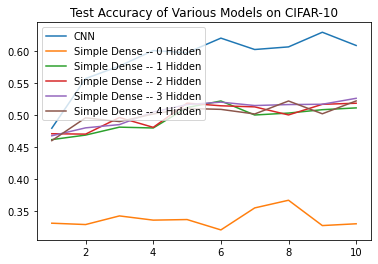

In [19]:
e = [1,2,3,4,5,6,7,8,9,10]
plt.plot(e, accuracy0, label = 'CNN')
plt.plot(e, accuracy1, label = 'Simple Dense -- 0 Hidden')
plt.plot(e, accuracy2, label = 'Simple Dense -- 1 Hidden')
plt.plot(e, accuracy3, label = 'Simple Dense -- 2 Hidden')
plt.plot(e, accuracy4, label = 'Simple Dense -- 3 Hidden')
plt.plot(e, accuracy5, label = 'Simple Dense -- 4 Hidden')


plt.title("Test Accuracy of Various Models on CIFAR-10")
plt.legend(loc="upper left")
plt.show()

The CNN has the best result. It is easier for optimizer to find better weights with CNN. We can see, with multiple hidden layers, the accuracy did not significantly improve. Maybe optimizer failed to find the best weights.

Question B:\
CNN model with Sigmoid function (Model 6):


In [20]:
class CNN1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.sigmoid(self.conv1(x)))
        x = self.pool(torch.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1) 
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x


model6 = CNN1()

In [21]:
accuracy6 = []
optimizer6 = optim.SGD(model6.parameters(), lr=0.001, momentum=0.9)
for epoch in range(10):  

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer6.zero_grad()
        outputs = model6(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer6.step()
        running_loss += loss.item()
        if i % 2000 == 1999:   
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
       for data in testloader:
          images, labels = data
          outputs = model6(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
    ac = correct / total
    accuracy6.append(ac)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

[1,  2000] loss: 2.315
[1,  4000] loss: 2.314
[1,  6000] loss: 2.313
[1,  8000] loss: 2.312
[1, 10000] loss: 2.312
[1, 12000] loss: 2.311
Accuracy of the network on the 10000 test images: 10 %
[2,  2000] loss: 2.310
[2,  4000] loss: 2.310
[2,  6000] loss: 2.308
[2,  8000] loss: 2.308
[2, 10000] loss: 2.307
[2, 12000] loss: 2.308
Accuracy of the network on the 10000 test images: 10 %
[3,  2000] loss: 2.308
[3,  4000] loss: 2.307
[3,  6000] loss: 2.307
[3,  8000] loss: 2.306
[3, 10000] loss: 2.306
[3, 12000] loss: 2.305
Accuracy of the network on the 10000 test images: 10 %
[4,  2000] loss: 2.305
[4,  4000] loss: 2.305
[4,  6000] loss: 2.305
[4,  8000] loss: 2.304
[4, 10000] loss: 2.305
[4, 12000] loss: 2.304
Accuracy of the network on the 10000 test images: 10 %
[5,  2000] loss: 2.304
[5,  4000] loss: 2.305
[5,  6000] loss: 2.304
[5,  8000] loss: 2.304
[5, 10000] loss: 2.303
[5, 12000] loss: 2.303
Accuracy of the network on the 10000 test images: 10 %
[6,  2000] loss: 2.303
[6,  4000] l

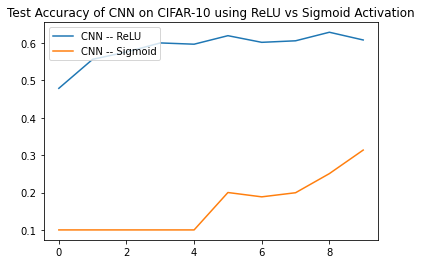

In [25]:
plt.plot(accuracy0,label='CNN -- ReLU')
plt.plot(accuracy6,label='CNN -- Sigmoid')
plt.title('Test Accuracy of CNN on CIFAR-10 using ReLU vs Sigmoid Activation')
plt.legend(loc="upper left")
plt.show()

ReLU activation function gives better result. Since sigmoid function are better with gradient vanishing problems.

Question C:\
Model with drop out (Model 7):

In [27]:
class CNN2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        self.dropout = nn.dropout(0.5)
        x = F.relu(self.fc2(x))
        self.dropout = nn.dropout(0.5)
        x = self.fc3(x)
        return x


model7 = CNN2()
optimizer7 = optim.SGD(model7.parameters(), lr=0.001, momentum=0.9)